### 인공지능과 기계학습 3주차 과제
IT공학전공 2012375 김단

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 1. 데이터 불러오기 및 탐색

df = pd.read_csv('/Users/dankim/AIML/usedcar.csv')
df

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,N
7902,8125,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,N
7903,8126,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,N
7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,N


In [3]:
# 1. 데이터 불러오기 및 탐색

# 불필요한 컬럼 제거
drop_cols = ['Sales_ID', 'name', 'Region', 'State or Province', 'City', 'torque', 'sold']
df.drop(columns=drop_cols, inplace=True)

# 데이터 구조 및 기초 통계 확인
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   int64  
 9   max_power      7906 non-null   float64
 10  seats          7906 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 679.6+ KB
None
              year  selling_price     km_driven      mileage       engine  \
count  7906.000000   7.906000e+03  7.906000e+03  7906.000000  7906.000000   
mean   2013.983936   6.498137e+05  6.918866e+04    19.419861  1458.708829   
std       3.863695   

In [4]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,5
1,2014,370000,120000,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,5
2,2006,158000,140000,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,5
3,2010,225000,127000,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,5
4,2007,130000,120000,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,5
...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,5
7902,2007,135000,119000,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,5
7903,2009,382000,120000,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,5
7904,2013,290000,25000,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,5


In [5]:
# 2. 데이터 탐색 및 시각화

# 2020년을 기준으로 차량의 연식을 계산하여 age 라는 이름의 파생 변수를 생성
df['age'] = 2020 - df['year']
df.drop(columns='year', inplace=True)
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,5,6
1,370000,120000,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,5,6
2,158000,140000,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,5,14
3,225000,127000,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,5,10
4,130000,120000,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,5,13
...,...,...,...,...,...,...,...,...,...,...,...
7901,320000,110000,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,5,7
7902,135000,119000,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,5,13
7903,382000,120000,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,5,11
7904,290000,25000,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,5,7


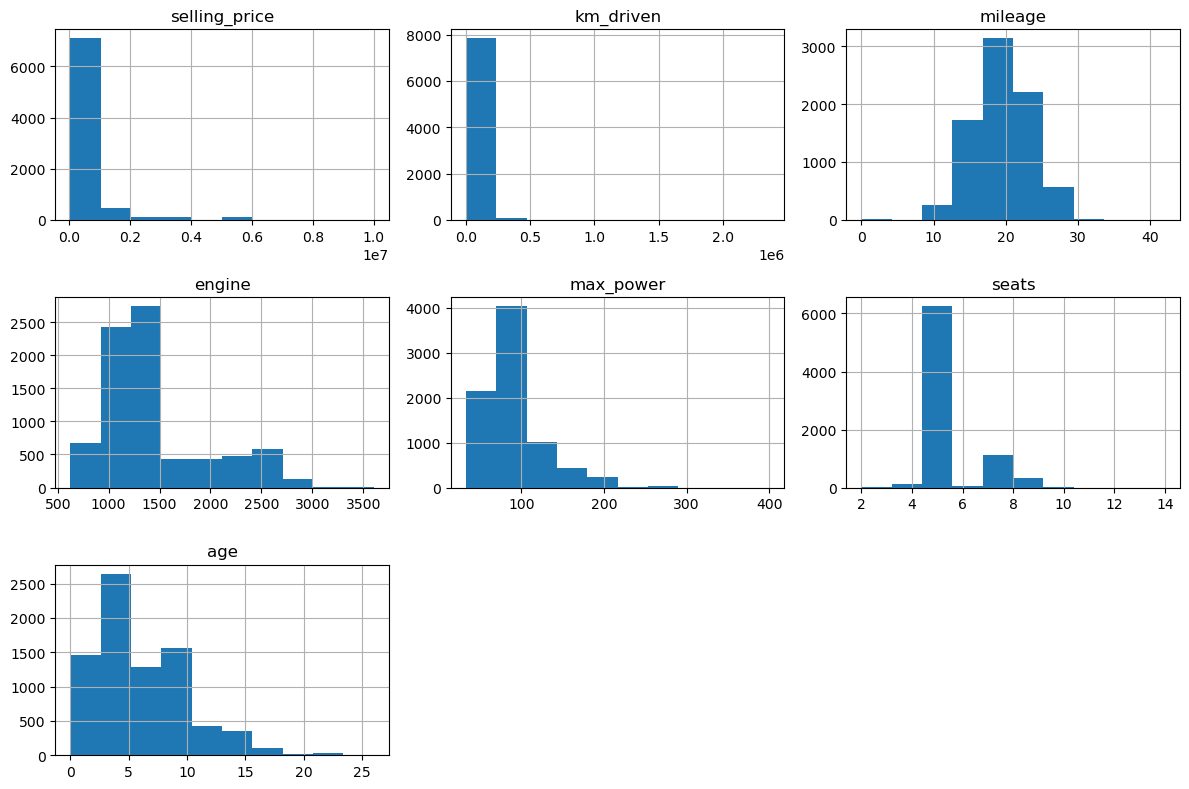

In [6]:
# 2. 데이터 탐색 및 시각화

# 히스토그램
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

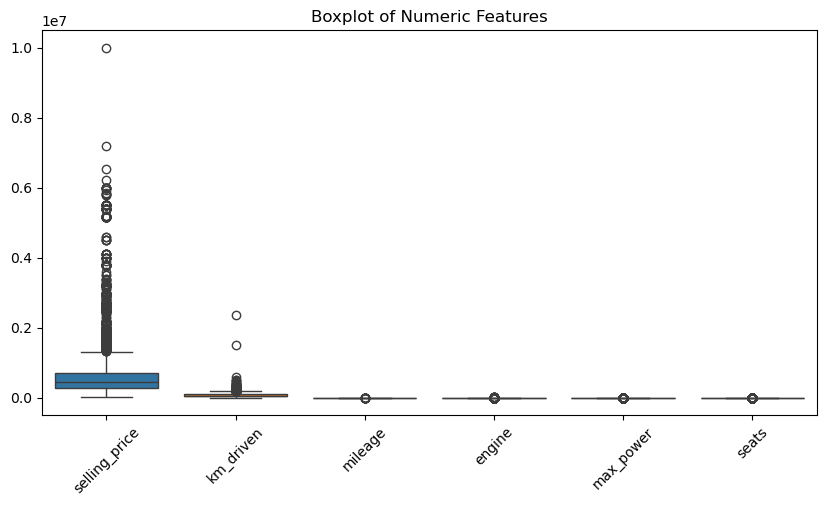

In [7]:
# 2. 데이터 탐색 및 시각화

# 상자 그림으로 이상치 확인
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']])
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features")
plt.show()

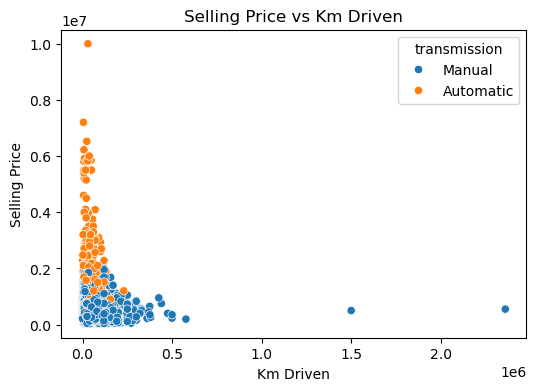

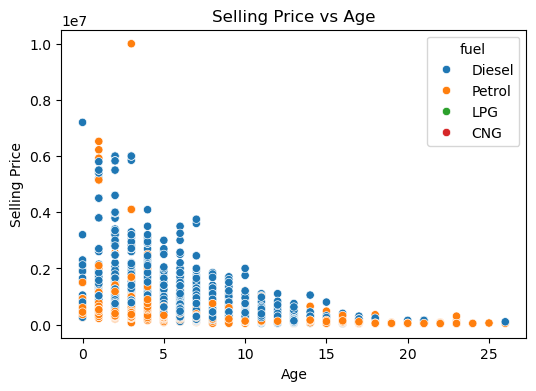

In [8]:
# 산점도 - 판매가 vs 주행거리
plt.figure(figsize=(6, 4))
sns.scatterplot(x='km_driven', y='selling_price',hue='transmission', data=df)
plt.title('Selling Price vs Km Driven')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

# 산점도 - 판매가 vs 연식
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='selling_price',hue='fuel', data=df)
plt.title('Selling Price vs Age')
plt.xlabel('Age')
plt.ylabel('Selling Price')
plt.show()


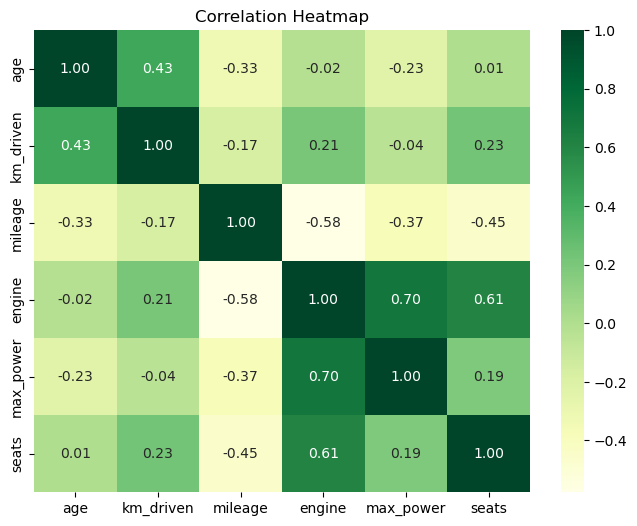

In [9]:
# 2. 데이터 탐색 및 시각화

# 수치형 변수만 선택
numeric_cols = ['age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# 상관계수 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='YlGn')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# 3. 데이터 준비

# 수치형 변수
numerical_variables = ['age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# 범주형 변수
categorical_variables = ['fuel', 'seller_type', 'transmission', 'owner']

# 타겟값
target = 'selling_price'

In [11]:
# 4. 데이터 분할

X = df[numerical_variables + categorical_variables]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 5. 전처리 파이프라인 구성

# 수치형: 스케일링 / 범주형: 원-핫 인코딩
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_variables),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_variables)
    ])

In [13]:
# 6. 전체 파이프라인 구성

from sklearn.ensemble import RandomForestRegressor

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [14]:
# 7. 하이퍼파라미터 탐색

param_dist = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    model_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'km_driven',
                                                                                'mileage',
                                                                                'engine',
                                                                                'max_power',
                                                                                'seats']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['fuel',
                                                                                'seller_type',
                                                                                'transmission',
                                                                                'owner'])])),
                                             ('regressor',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'regressor__max_depth': [None, 10, 20,
                                                                 30],
                                        'regressor__min_samples_leaf': [1, 2,
                                                                        4],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10],
                                        'regressor__n_estimators': [50, 100,
                                                                    200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [15]:
# 8. 모델 학습 및 평가

# 최적 모델로 예측
y_pred = random_search.predict(X_test)

# 평가 지표
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 61248.47
MSE: 11498356103.38
RMSE: 107230.39
R2 Score: 0.98
